# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=d6a936bda01c0cbf3a0316e9d7ad05db3889ca8f8081a1d4bf35a0bd84a51602
  Stored in directory: c:\users\jack\appdata\local\pip\cache\wheels\49\05\c1\6baa8ceb020ca642133e903591948e0fbe269e9c519aefd95d
Successfully built citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    final_url = f"{url}q={city_url}&appid={weather_api_key}&units={unit}"
    response = requests.get(final_url).json()
    print(response)
    try:
        # Parse the JSON and retrieve data
        city_weather = response["main"]["temp"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
{'coord': {'lon': -36.5092, 'lat': -54.2811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 5.89, 'feels_like': 4.53, 'temp_min': 5.89, 'temp_max': 5.89, 'pressure': 996, 'humidity': 98, 'sea_level': 996, 'grnd_level': 991}, 'visibility': 344, 'wind': {'speed': 1.88, 'deg': 133, 'gust': 2.37}, 'clouds': {'all': 100}, 'dt': 1713568263, 'sys': {'country': 'GS', 'sunrise': 1713518624, 'sunset': 1713554759}, 'timezone': -7200, 'id': 3426466, 'name': 'Grytviken', 'cod': 200}
Processing Record 2 of Set 1 | berdigestyakh
{'coord': {'lon': 126.6992, 'lat': 62.0989}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -1.13, 'feels_like': -5.01, 'temp_min': -1.13, 'temp_max': -1.13, 'pressure': 1021, 'humidity': 93, 'sea_level': 1021, '

{'coord': {'lon': 45.8349, 'lat': 13.8378}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 23.65, 'feels_like': 24.03, 'temp_min': 23.65, 'temp_max': 23.65, 'pressure': 1009, 'humidity': 75, 'sea_level': 1009, 'grnd_level': 876}, 'visibility': 10000, 'wind': {'speed': 0.58, 'deg': 64, 'gust': 1.43}, 'rain': {'1h': 1.04}, 'clouds': {'all': 26}, 'dt': 1713568365, 'sys': {'country': 'YE', 'sunrise': 1713580813, 'sunset': 1713625826}, 'timezone': 10800, 'id': 74219, 'name': 'Jawf al Maqbabah', 'cod': 200}
Processing Record 16 of Set 1 | stanley
{'coord': {'lon': -1.6985, 'lat': 54.868}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 1.41, 'feels_like': -1.88, 'temp_min': 0.71, 'temp_max': 2.1, 'pressure': 1025, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1713568366, 'sys': {'type

{'coord': {'lon': 50.8122, 'lat': 9.4942}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.65, 'feels_like': 33.4, 'temp_min': 28.65, 'temp_max': 28.65, 'pressure': 1007, 'humidity': 78, 'sea_level': 1007, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.2, 'deg': 127, 'gust': 3.46}, 'clouds': {'all': 58}, 'dt': 1713568373, 'sys': {'country': 'SO', 'sunrise': 1713579846, 'sunset': 1713624404}, 'timezone': 10800, 'id': 64814, 'name': 'Bandarbeyla', 'cod': 200}
Processing Record 31 of Set 1 | ola
{'coord': {'lon': 151.2833, 'lat': 59.5833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.63, 'feels_like': -3.6, 'temp_min': 0.63, 'temp_max': 0.63, 'pressure': 1032, 'humidity': 73, 'sea_level': 1032, 'grnd_level': 1031}, 'visibility': 10000, 'wind': {'speed': 4.13, 'deg': 28, 'gust': 5.62}, 'clouds': {'all': 71}, '

{'coord': {'lon': -14.7482, 'lat': 13.745}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 34.44, 'feels_like': 31.83, 'temp_min': 34.44, 'temp_max': 34.44, 'pressure': 1008, 'humidity': 9, 'sea_level': 1008, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.96, 'deg': 295, 'gust': 6.17}, 'clouds': {'all': 33}, 'dt': 1713568375, 'sys': {'country': 'SN', 'sunrise': 1713508985, 'sunset': 1713553954}, 'timezone': 0, 'id': 2412778, 'name': 'Baiti', 'cod': 200}
Processing Record 45 of Set 1 | pontianak
{'coord': {'lon': 109.3333, 'lat': -0.0333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.55, 'feels_like': 26.77, 'temp_min': 25.55, 'temp_max': 25.99, 'pressure': 1007, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1713568375, 'sys': {'type': 2, 'id': 2

{'coord': {'lon': 166.4372, 'lat': 68.0546}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -14.04, 'feels_like': -19.48, 'temp_min': -14.04, 'temp_max': -14.04, 'pressure': 1032, 'humidity': 86, 'sea_level': 1032, 'grnd_level': 994}, 'visibility': 1010, 'wind': {'speed': 2.39, 'deg': 246, 'gust': 2.22}, 'clouds': {'all': 100}, 'dt': 1713568358, 'sys': {'country': 'RU', 'sunrise': 1713544854, 'sunset': 1713603904}, 'timezone': 43200, 'id': 2126682, 'name': 'Bilibino', 'cod': 200}
Processing Record 9 of Set 2 | urangan
{'coord': {'lon': 152.9, 'lat': -25.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.78, 'feels_like': 22.52, 'temp_min': 21.78, 'temp_max': 21.78, 'pressure': 1013, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 242, 'gust': 5.36}, 'clouds': {'all': 100}, 'dt': 1713568378, 'sys': {

{'coord': {'lon': 135.6, 'lat': 62.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -0.39, 'feels_like': -3.53, 'temp_min': -0.39, 'temp_max': -0.39, 'pressure': 1025, 'humidity': 75, 'sea_level': 1025, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.54, 'deg': 52, 'gust': 5.12}, 'clouds': {'all': 95}, 'dt': 1713568388, 'sys': {'country': 'RU', 'sunrise': 1713554109, 'sunset': 1713609448}, 'timezone': 32400, 'id': 2022773, 'name': 'Khandyga', 'cod': 200}
Processing Record 24 of Set 2 | ust-nera
{'coord': {'lon': 143.2, 'lat': 64.5667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -7.23, 'feels_like': -11.23, 'temp_min': -7.23, 'temp_max': -7.23, 'pressure': 1039, 'humidity': 91, 'sea_level': 1039, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 71, 'gust': 2.18}, 'clouds': {'all':

{'coord': {'lon': -135.0538, 'lat': 60.7161}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 7.28, 'feels_like': 5.52, 'temp_min': 7.28, 'temp_max': 7.28, 'pressure': 1025, 'humidity': 68, 'sea_level': 1025, 'grnd_level': 948}, 'visibility': 10000, 'wind': {'speed': 2.61, 'deg': 142, 'gust': 3.46}, 'clouds': {'all': 23}, 'dt': 1713568406, 'sys': {'country': 'CA', 'sunrise': 1713533207, 'sunset': 1713587470}, 'timezone': -25200, 'id': 6180550, 'name': 'Whitehorse', 'cod': 200}
Processing Record 39 of Set 2 | formosa do rio preto
{'coord': {'lon': -45.1931, 'lat': -11.0483}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.44, 'feels_like': 26.08, 'temp_min': 25.44, 'temp_max': 25.44, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 944}, 'visibility': 10000, 'wind': {'speed': 1.27, 'deg': 214, 'gust': 2.01}, '

{'coord': {'lon': 168.1028, 'lat': 5.5994}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.24, 'feels_like': 33.23, 'temp_min': 28.24, 'temp_max': 28.24, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 7.95, 'deg': 74, 'gust': 10.03}, 'rain': {'1h': 0.4}, 'clouds': {'all': 16}, 'dt': 1713568417, 'sys': {'country': 'MH', 'sunrise': 1713551900, 'sunset': 1713596058}, 'timezone': 43200, 'id': 7306522, 'name': 'Namdrik', 'cod': 200}
Processing Record 4 of Set 3 | carnarvon
{'coord': {'lon': 113.6333, 'lat': -24.8667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.5, 'feels_like': 22.82, 'temp_min': 23.5, 'temp_max': 23.5, 'pressure': 1018, 'humidity': 35, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 6.44, 'deg': 84, 'gust': 13.19}, 'clo

{'coord': {'lon': 128.7333, 'lat': -15.7667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23.99, 'feels_like': 23.57, 'temp_min': 23.99, 'temp_max': 23.99, 'pressure': 1014, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 150}, 'clouds': {'all': 31}, 'dt': 1713568424, 'sys': {'type': 1, 'id': 9587, 'country': 'AU', 'sunrise': 1713562409, 'sunset': 1713604445}, 'timezone': 28800, 'id': 2068110, 'name': 'Kununurra', 'cod': 200}
Processing Record 18 of Set 3 | kutum
{'coord': {'lon': 24.6667, 'lat': 14.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.77, 'feels_like': 24.77, 'temp_min': 25.77, 'temp_max': 25.77, 'pressure': 1008, 'humidity': 14, 'sea_level': 1008, 'grnd_level': 882}, 'visibility': 10000, 'wind': {'speed': 2.16, 'deg': 63, 'gust': 2.39}, 'clouds': {'all': 95}, 'dt': 1713568424, 's

{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.3, 'feels_like': 16.97, 'temp_min': 14.19, 'temp_max': 18.85, 'pressure': 1015, 'humidity': 72}, 'visibility': 9656, 'wind': {'speed': 6.17, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1713568433, 'sys': {'type': 2, 'id': 2008778, 'country': 'US', 'sunrise': 1713533454, 'sunset': 1713581994}, 'timezone': -25200, 'id': 5563839, 'name': 'Fortuna', 'cod': 200}
Processing Record 34 of Set 3 | arraial do cabo
{'coord': {'lon': -42.0278, 'lat': -22.9661}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 23.83, 'feels_like': 23.94, 'temp_min': 23.83, 'temp_max': 23.83, 'pressure': 1020, 'humidity': 64, 'sea_level': 1020, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 4.53, 'deg': 205, 'gust': 4.51}, 'clouds': {'all': 15}, 'dt': 1713568180,

{'coord': {'lon': 88.3972, 'lat': 69.4865}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -9.89, 'feels_like': -9.89, 'temp_min': -9.89, 'temp_max': -9.89, 'pressure': 1014, 'humidity': 95, 'sea_level': 1014, 'grnd_level': 1005}, 'visibility': 132, 'wind': {'speed': 0.17, 'deg': 7, 'gust': 1.36}, 'snow': {'1h': 0.4}, 'clouds': {'all': 100}, 'dt': 1713568436, 'sys': {'type': 2, 'id': 49144, 'country': 'RU', 'sunrise': 1713562827, 'sunset': 1713623384}, 'timezone': 25200, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
Processing Record 48 of Set 3 | kapa'a
{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 23.06, 'feels_like': 23.56, 'temp_min': 22.33, 'temp_max': 26.99, 'pressure': 1021, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 70}, 'clouds': {'all': 100}, 'dt': 1713568

{'coord': {'lon': -127.1743, 'lat': 54.7804}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.69, 'feels_like': 8.57, 'temp_min': 10.69, 'temp_max': 10.69, 'pressure': 1025, 'humidity': 29, 'sea_level': 1025, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 3.61, 'deg': 104, 'gust': 4.34}, 'clouds': {'all': 95}, 'dt': 1713568438, 'sys': {'country': 'CA', 'sunrise': 1713532478, 'sunset': 1713584418}, 'timezone': -25200, 'id': 6149996, 'name': 'Smithers', 'cod': 200}
Processing Record 13 of Set 4 | albany
{'coord': {'lon': -73.9662, 'lat': 42.6001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.26, 'feels_like': 11.32, 'temp_min': 11.14, 'temp_max': 13.23, 'pressure': 1013, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 2.68, 'deg': 235, 'gust': 4.47}, 'clouds': {'all': 100}, 'dt': 1713568428, 'sys':

{'coord': {'lon': 57.329, 'lat': 37.4747}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.97, 'feels_like': 9.53, 'temp_min': 10.97, 'temp_max': 10.97, 'pressure': 1013, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1713568451, 'sys': {'type': 1, 'id': 7488, 'country': 'IR', 'sunrise': 1713576526, 'sunset': 1713624597}, 'timezone': 12600, 'id': 140380, 'name': 'Bojnourd', 'cod': 200}
Processing Record 27 of Set 4 | akwatia
{'coord': {'lon': -0.8088, 'lat': 6.0402}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.15, 'feels_like': 26.15, 'temp_min': 26.15, 'temp_max': 26.15, 'pressure': 1011, 'humidity': 92, 'sea_level': 1011, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 1.56, 'deg': 183, 'gust': 5.32}, 'clouds': {'all': 97}, 'dt': 1713568455, 'sys': {'count

{'coord': {'lon': 145.8556, 'lat': 44.0306}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 2.43, 'feels_like': -4.57, 'temp_min': 2.43, 'temp_max': 2.43, 'pressure': 1002, 'humidity': 97, 'sea_level': 1002, 'grnd_level': 992}, 'wind': {'speed': 13, 'deg': 325, 'gust': 19.42}, 'rain': {'1h': 3.16}, 'clouds': {'all': 100}, 'dt': 1713568472, 'sys': {'type': 2, 'id': 2087968, 'country': 'RU', 'sunrise': 1713554699, 'sunset': 1713603936}, 'timezone': 36000, 'id': 2119447, 'name': 'Yuzhno-Kurilsk', 'cod': 200}
Processing Record 42 of Set 4 | presidente olegario
{'coord': {'lon': -46.4181, 'lat': -18.4178}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.42, 'feels_like': 20.79, 'temp_min': 20.42, 'temp_max': 20.42, 'pressure': 1016, 'humidity': 87, 'sea_level': 1016, 'grnd_level': 915}, 'visibility': 10000, 'wind': {'speed': 1.85, 

{'coord': {'lon': 80.7911, 'lat': 6.024}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.12, 'feels_like': 26.12, 'temp_min': 26.12, 'temp_max': 26.12, 'pressure': 1007, 'humidity': 91, 'sea_level': 1007, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 3.01, 'deg': 272, 'gust': 4.98}, 'clouds': {'all': 100}, 'dt': 1713568220, 'sys': {'country': 'LK', 'sunrise': 1713572829, 'sunset': 1713617033}, 'timezone': 19800, 'id': 1227037, 'name': 'Tangalle', 'cod': 200}
Processing Record 7 of Set 5 | susuman
{'coord': {'lon': 148.1667, 'lat': 62.7833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -9.45, 'feels_like': -12.18, 'temp_min': -9.45, 'temp_max': -9.45, 'pressure': 1039, 'humidity': 98}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 49, 'gust': 1.34}, 'clouds': {'all': 100}, 'dt': 1713568363, 'sys': {

{'coord': {'lon': 33.4478, 'lat': 69.1989}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -13, 'feels_like': -19.86, 'temp_min': -13, 'temp_max': -13, 'pressure': 1025, 'humidity': 89, 'sea_level': 1025, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.63, 'deg': 109, 'gust': 7}, 'clouds': {'all': 34}, 'dt': 1713568372, 'sys': {'country': 'RU', 'sunrise': 1713576121, 'sunset': 1713636463}, 'timezone': 10800, 'id': 506763, 'name': 'Polyarny', 'cod': 200}
Processing Record 24 of Set 5 | sitka
{'coord': {'lon': -135.33, 'lat': 57.0531}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.94, 'feels_like': 16.36, 'temp_min': 17.94, 'temp_max': 17.94, 'pressure': 1022, 'humidity': 22}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1713568490, 'sys': {'type': 1, 'id': 7795, 'country'

{'coord': {'lon': 98.2, 'lat': 14.0833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 24.51, 'feels_like': 25.34, 'temp_min': 24.51, 'temp_max': 24.51, 'pressure': 1008, 'humidity': 89, 'sea_level': 1008, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 1.53, 'deg': 41, 'gust': 1.72}, 'clouds': {'all': 50}, 'dt': 1713568495, 'sys': {'country': 'MM', 'sunrise': 1713568237, 'sunset': 1713613270}, 'timezone': 23400, 'id': 1293625, 'name': 'Dawei', 'cod': 200}
Processing Record 40 of Set 5 | dabola
{'coord': {'lon': -11.1167, 'lat': 10.75}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 30.9, 'feels_like': 28.88, 'temp_min': 30.9, 'temp_max': 30.9, 'pressure': 1009, 'humidity': 16, 'sea_level': 1009, 'grnd_level': 960}, 'visibility': 10000, 'wind': {'speed': 0.81, 'deg': 226, 'gust': 0.83}, 'clouds': {'all': 22}, 'dt'

{'coord': {'lon': -149.55, 'lat': -17.75}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 30.82, 'feels_like': 37.82, 'temp_min': 30.37, 'temp_max': 30.82, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 7.42, 'deg': 67, 'gust': 7.32}, 'clouds': {'all': 21}, 'dt': 1713568500, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1713542897, 'sunset': 1713584738}, 'timezone': -36000, 'id': 4033951, 'name': 'Papao', 'cod': 200}
Processing Record 5 of Set 6 | bay harbor
{'coord': {'lon': -85.6146, 'lat': 30.1471}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.78, 'feels_like': 25.35, 'temp_min': 23.85, 'temp_max': 26.04, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1713568501, 'sys': {'type

{'coord': {'lon': 126.3033, 'lat': 8.8908}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.08, 'feels_like': 26.08, 'temp_min': 26.08, 'temp_max': 26.08, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 0.56, 'deg': 330, 'gust': 1.29}, 'clouds': {'all': 92}, 'dt': 1713568515, 'sys': {'country': 'PH', 'sunrise': 1713561764, 'sunset': 1713606255}, 'timezone': 28800, 'id': 1730232, 'name': 'Aras-asan', 'cod': 200}
Processing Record 19 of Set 6 | tara
{'coord': {'lon': 74.371, 'lat': 56.8944}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2.38, 'feels_like': 0.8, 'temp_min': 2.38, 'temp_max': 2.38, 'pressure': 1028, 'humidity': 85, 'sea_level': 1028, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 1.61, 'deg': 80, 'gust': 3.29}, 'clouds': {'all': 9

KeyboardInterrupt: 

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          267
Lat           267
Lng           267
Max Temp      267
Humidity      267
Cloudiness    267
Wind Speed    267
Country       267
Date          267
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,5.89,98,100,1.88,GS,1713568263
1,berdigestyakh,62.0989,126.6992,-1.13,93,100,3.17,RU,1713568355
2,atafu village,-8.5421,-172.5159,27.83,81,87,5.11,TK,1713568356
3,lebu,-37.6167,-73.6500,12.31,82,100,3.61,CL,1713568357
4,armacao de buzios,-22.7469,-41.8817,22.86,68,96,4.06,BR,1713568357


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.89,98,100,1.88,GS,1713568263
1,berdigestyakh,62.0989,126.6992,-1.13,93,100,3.17,RU,1713568355
2,atafu village,-8.5421,-172.5159,27.83,81,87,5.11,TK,1713568356
3,lebu,-37.6167,-73.6500,12.31,82,100,3.61,CL,1713568357
4,armacao de buzios,-22.7469,-41.8817,22.86,68,96,4.06,BR,1713568357


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

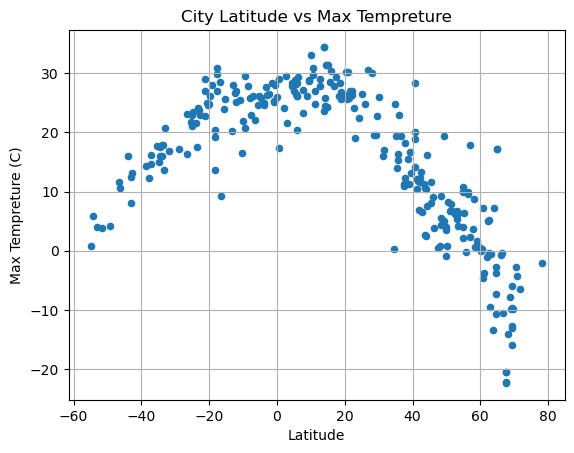

In [38]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(["Lat"],["Max Temp"],grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempreture (C)")
plt.title("City Latitude vs Max Tempreture")
# Save the figure
plt.savefig("output_data1")

# Show plot
plt.show()

#### Latitude Vs. Humidity

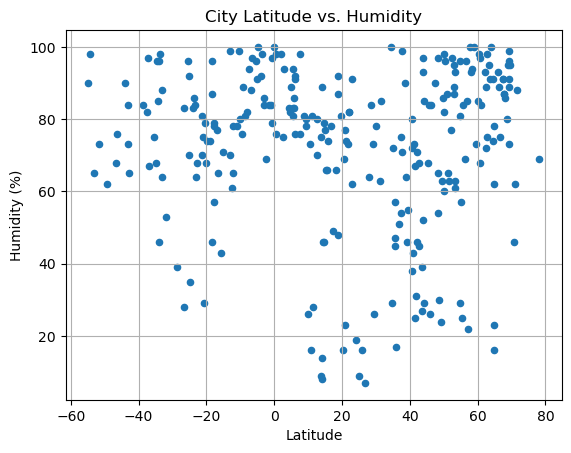

In [25]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat","Humidity", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
# Save the figure
plt.savefig("output_data2")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

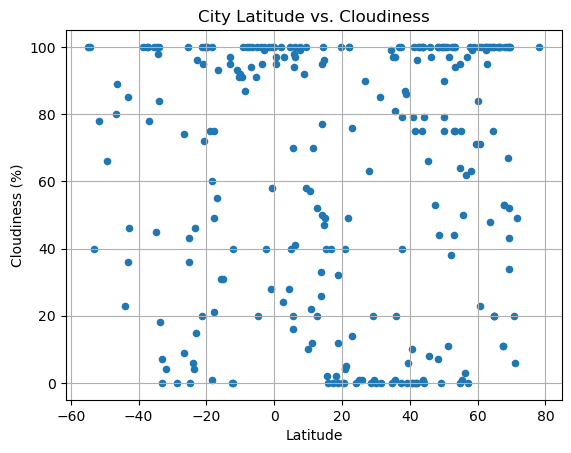

In [26]:
city_data_df.plot.scatter("Lat","Cloudiness", grid =True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
# Save the figure
plt.savefig("output_data3")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

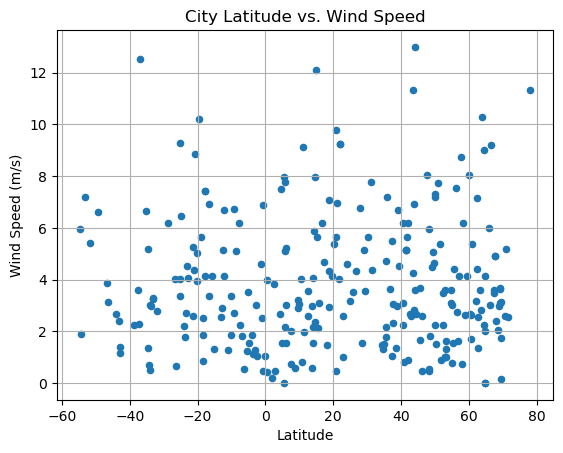

In [27]:
# Save the figure
city_data_df.plot.scatter("Lat","Wind Speed", grid = True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
# Save the figure
plt.savefig("output_data4")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


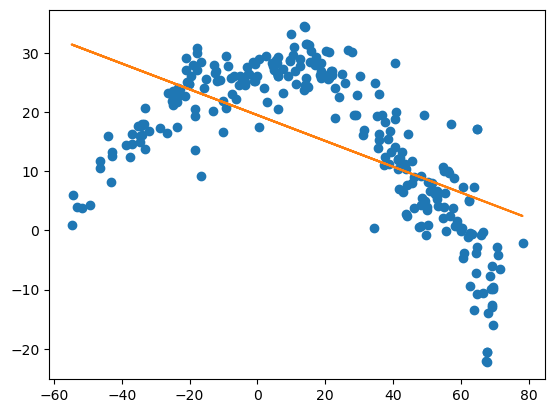

In [31]:
# Define a function to create Linear Regression plots

def regress_line(x, y):
    slope, intercept, r, _, _ = linregress(x, y)
    plt.plot(x, y, 'o', x, slope*x + intercept, '-')  # Plot data and line
    plt.show()
    
regress_line(city_data_df["Lat"],city_data_df["Max Temp"])

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,berdigestyakh,62.0989,126.6992,-1.13,93,100,3.17,RU,1713568355
6,wanning,18.8003,110.3967,26.90,87,12,7.09,CN,1713568360
7,yelizovo,53.1873,158.3805,6.08,61,75,1.00,RU,1713568360
8,hawaiian paradise park,19.5933,-154.9731,26.04,81,100,4.12,US,1713568363
10,thunder bay,48.4001,-89.3168,4.32,54,100,5.95,CA,1713568129


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE



southern_df = city_data_df.loc[city_data_df["Lat"] <= 0]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.89,98,100,1.88,GS,1713568263
2,atafu village,-8.5421,-172.5159,27.83,81,87,5.11,TK,1713568356
3,lebu,-37.6167,-73.6500,12.31,82,100,3.61,CL,1713568357
4,armacao de buzios,-22.7469,-41.8817,22.86,68,96,4.06,BR,1713568357
5,west mackay,-21.1481,149.1605,27.02,75,95,4.35,AU,1713568360


###  Temperature vs. Latitude Linear Regression Plot

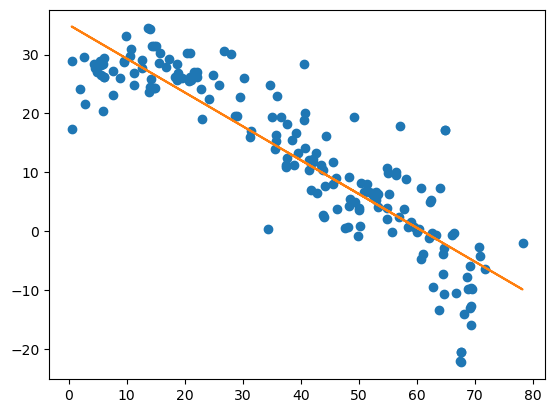

In [44]:
# Linear regression on Northern Hemisphere
def regress_line(x, y):
    slope, intercept, r, _, _ = linregress(x, y)
    plt.plot(x, y, 'o', x, slope*x + intercept, '-')  # Plot data and line
    plt.show()
    
regress_line(northern_df["Lat"],northern_df["Max Temp"])

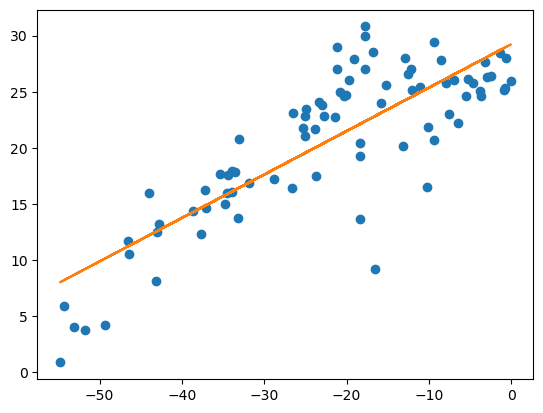

In [41]:
# Linear regression on Southern Hemisphere
def regress_line(x, y):
    slope, intercept, r, _, _ = linregress(x, y)
    plt.plot(x, y, 'o', x, slope*x + intercept, '-')  # Plot data and line
    plt.show()
    
regress_line(southern_df["Lat"],southern_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

In [ ]:
#The north is trending downwards while the south is trending upwards. 
#This shows me the north has a negative correlation where the tempature and lat are inverse
#The south has a positive correlation which shows a positive increase between the lat and temp in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

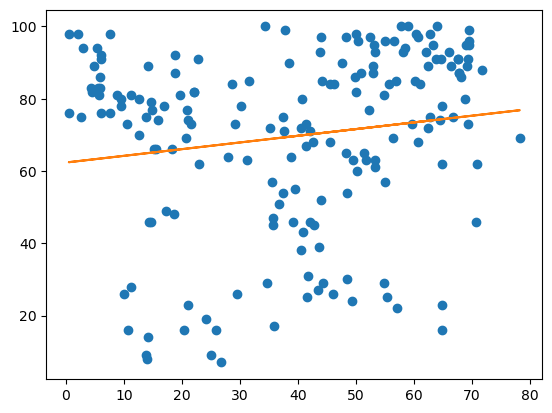

In [45]:
# Northern Hemisphere
def regress_line(x, y):
    slope, intercept, r, _, _ = linregress(x, y)
    plt.plot(x, y, 'o', x, slope*x + intercept, '-')  # Plot data and line
    plt.show()
    
regress_line(northern_df["Lat"],northern_df["Humidity"])

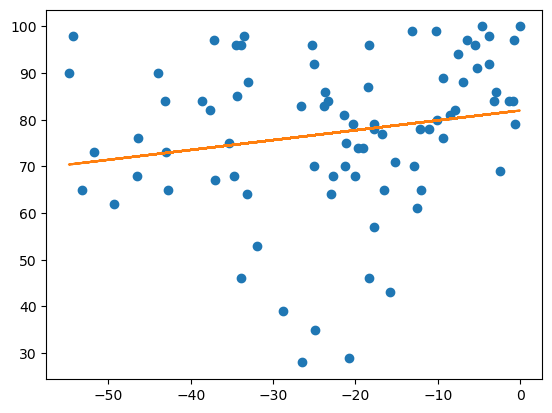

In [46]:
# Southern Hemisphere
def regress_line(x, y):
    slope, intercept, r, _, _ = linregress(x, y)
    plt.plot(x, y, 'o', x, slope*x + intercept, '-')  # Plot data and line
    plt.show()
    
regress_line(southern_df["Lat"],southern_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [49]:
#in both cases where the line is almost straight it shows a weak positive correlation between latitude and humidity 
#this means for both there is a slight increase in humidity as lat increases

### Cloudiness vs. Latitude Linear Regression Plot

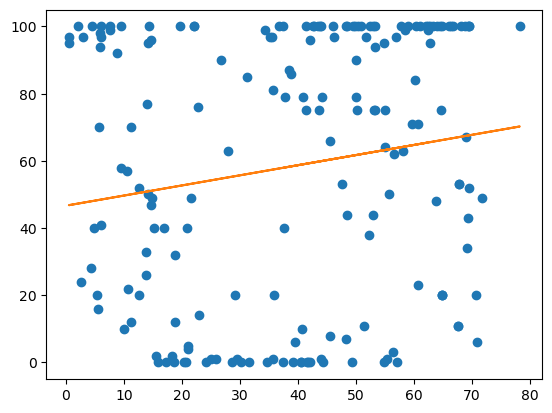

In [47]:
# Northern Hemisphere
def regress_line(x, y):
    slope, intercept, r, _, _ = linregress(x, y)
    plt.plot(x, y, 'o', x, slope*x + intercept, '-')  # Plot data and line
    plt.show()
    
regress_line(northern_df["Lat"],northern_df["Cloudiness"])

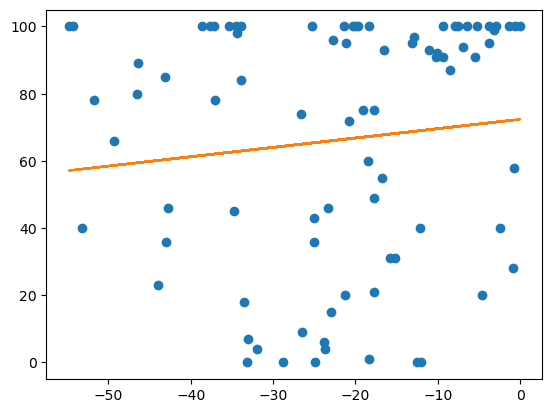

In [48]:
# Southern Hemisphere
def regress_line(x, y):
    slope, intercept, r, _, _ = linregress(x, y)
    plt.plot(x, y, 'o', x, slope*x + intercept, '-')  # Plot data and line
    plt.show()
    
regress_line(southern_df["Lat"],southern_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#in both cases where the line is almost straight it shows a weak positive correlation between latitude and humidity 
#this means for both there is a slight increase in clouds as lat increases with a stronger relationship in the north compared to the south

### Wind Speed vs. Latitude Linear Regression Plot

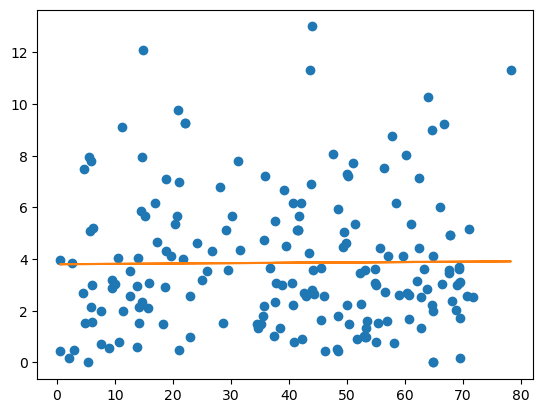

In [50]:
# Northern Hemisphere
def regress_line(x, y):
    slope, intercept, r, _, _ = linregress(x, y)
    plt.plot(x, y, 'o', x, slope*x + intercept, '-')  # Plot data and line
    plt.show()
    
regress_line(northern_df["Lat"],northern_df["Wind Speed"])

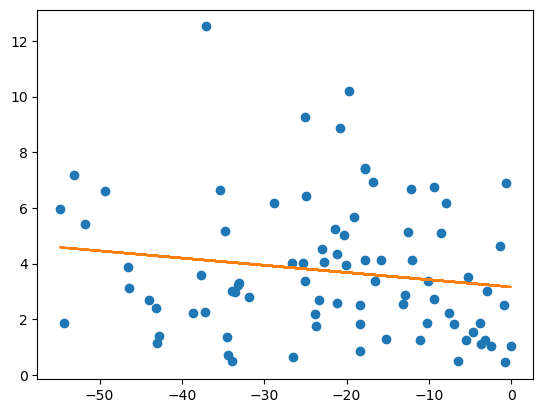

In [51]:
# Southern Hemisphere
def regress_line(x, y):
    slope, intercept, r, _, _ = linregress(x, y)
    plt.plot(x, y, 'o', x, slope*x + intercept, '-')  # Plot data and line
    plt.show()
    
regress_line(southern_df["Lat"],southern_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [52]:
#a straight line in the north means there is little to no relation 
#while there is a very slight negative relation in the south